### Add the scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 6\Bati-Bank-Credit-Scoring\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load the Data

In [4]:
PATH = "../data/data.csv"

data = pd.read_csv(PATH)

### Start of user value analysis (Credit Analysis)

In [5]:
from scripts.credit_risk_modeler import CreditScoreEngine

credit_engine = CreditScoreEngine(transaction_data=data)

1. Obtain RFMS values for each customer

In [6]:
rfms_data = credit_engine.calcualte_rfms()

2. RFMS scoring

After calculating RFMS I will score them 1 through 5,  5 being the highest and 1 being the lowest. The way I did this is by using quantiles as identifies of scores. I will create 5 quantiles and then they will 
- Recency : 5 is given to the most recent visitors and 1 is given to least recent visitors.
- Frequency: 5 is given to users that have high frequency of transactions and 1 for those who don't
- Monetary: 5 is given to users that have high transaction amount and 1 for those who have low transaction amounts.
- Std_Deviation: 5 is given to users whoes transaction amounts are consistent and 1 for those that aren't.

Now what is left is to combine the scores into one variable. Giving different importance to all of measures, i.e RFMS measures/scores. Here are the level of importance:
- Recency has the lowest importance with a weight of 10% on the overall combined score
- Monetary has the highest importance with a weight of 50% on the overall combined score
- Frequency and Std_Deviation have the same importance with both weighing 20% on the overall combined score

In [7]:
rfms_scoring = credit_engine.score_rfms(rfms_data=rfms_data)

- Investigate the distribution of the scores amongst users

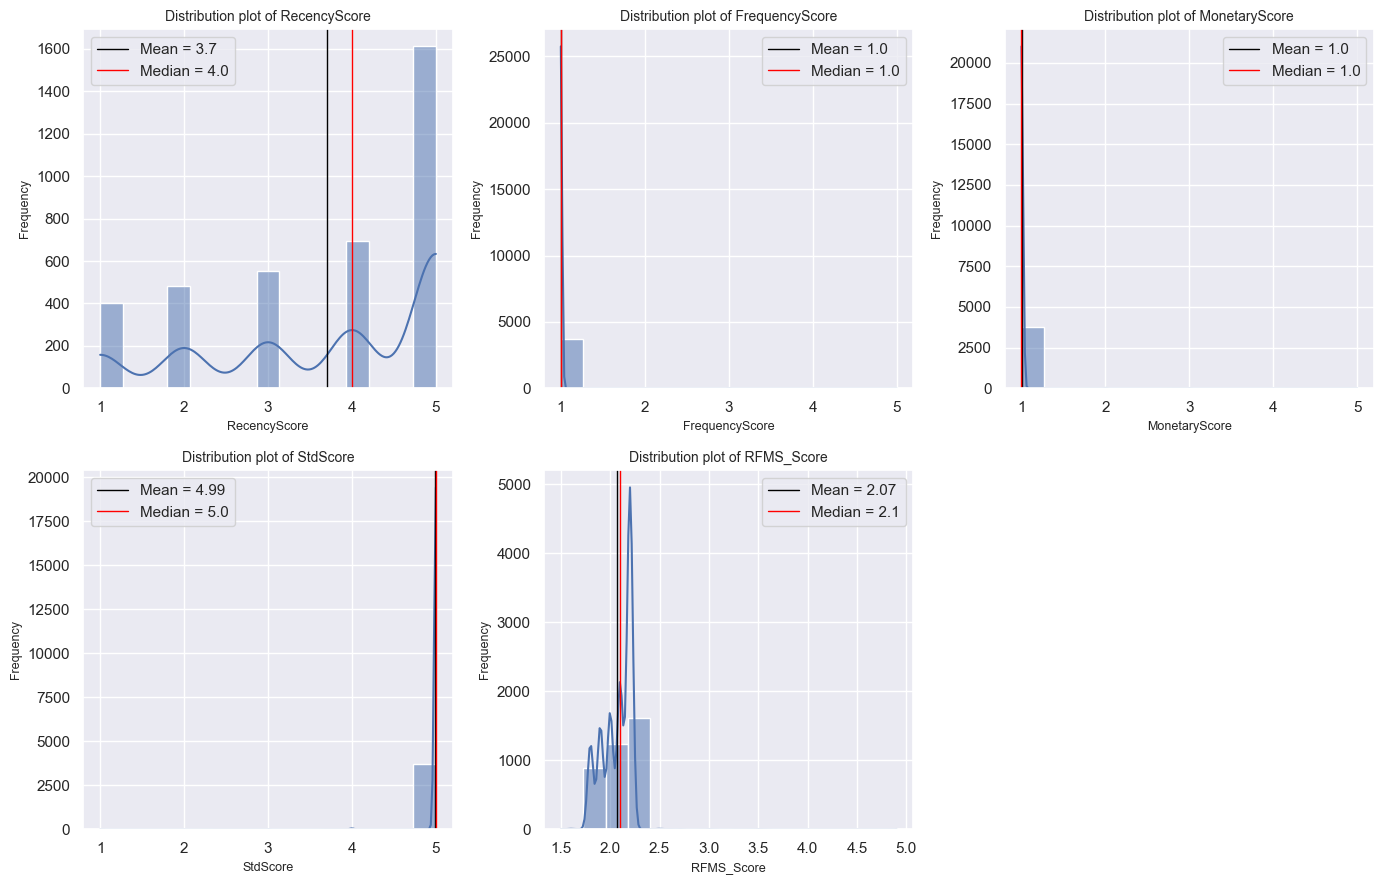

In [8]:
from scripts.utils import visualize_numerical_distribution

visualize_numerical_distribution(data=rfms_scoring)

- Add basic summary statistics to accompany the plot

In [9]:
rfms_scoring.describe()

,RecencyScore,FrequencyScore,MonetaryScore,StdScore,RFMS_Score
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,3.704436,1.002138,1.003741,4.994655,2.071673
std,1.403885,0.080068,0.098026,0.105822,0.152128
min,1.000000,1.000000,1.000000,1.000000,1.500000
25%,3.000000,1.000000,1.000000,5.000000,2.000000
50%,4.000000,1.000000,1.000000,5.000000,2.100000
75%,5.000000,1.000000,1.000000,5.000000,2.200000
max,5.000000,5.000000,5.000000,5.000000,4.900000


From the plot and the basic summary we can observe that:
- `RecencyScore`: its distribution is left skewed. THis means that most users have high recency scores and only a few have low scores. This means that most users have performed a transaction recently. This shows good activity amongst the users.

- `FrequencyScore`: its distribution isn't skewed, but all of the results are around 1. This means that users don't perform transactions that frequently.

- `MonetaryScore`: its distribution is slightly skewed to the right, this means that most users have moved not that much money except a select few users.

- `Std_Score`: its distribution is slightly skewed to the left, this means that most users' transactions envolve somewhat the same amounts of money while few users have a habit of transfering amounts that vary a lot.

- `RFMS_Score`: its distribution is slightly skewed to the left and the scores are mostly concetrated between 1.7 - 2.4. This indicates that most users have moderate RFMS scores while there are a very small minority at the end of the score extremes.